###1.Import Package

In [19]:
import numpy as np
from urllib import request
from PIL import Image 
import gzip
import pickle
import requests
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow.keras as keras 

##2.Data processing


In [20]:
filenames = ["train-images-idx3-ubyte.gz", "t10k-images-idx3-ubyte.gz", 
            "train-labels-idx1-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]


folder = 'data_mnist/'
def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filenames:
        print("Downloading " + name + "...")
        request.urlretrieve(base_url + name, folder + name)
    print("Download complete.")

download_mnist()

Download complete.


In [21]:
# load training images
with gzip.open('data_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

# load testing images
with gzip.open('data_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

# load training labels
with gzip.open('data_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


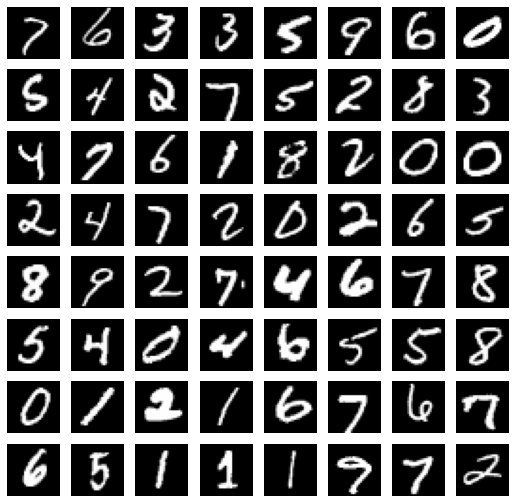

In [22]:
# Tạo dang sách 9 phần tử ngẫu nhiên từ m_train có 60.000 phần tử
indices = list(np.random.randint(60000, size=64))

fig = plt.figure(figsize=(9,9))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = X_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [23]:
# data processing

# convert to float
X_train = X_train.astype("float") 
y_train = y_train.astype("float")

# data normalization
mean = np.mean(X_train) # find mean 
std = np.std(X_train) # find std

print("mean:", mean)
print("std:", std)

X_train = (X_train -mean)/std
X_test = (X_test - mean)/std

# flatten data befor push to train 

X_train = X_train.reshape((-1,28*28))
X_test = X_test.reshape((-1,28*28))

print("x_train:", X_train.shape)
print("x_test:",X_test.shape)

mean: 33.318421449829934
std: 78.56748998339798
x_train: (60000, 784)
x_test: (10000, 784)


##3.Model SoftMax

In [16]:
tf.random.set_seed(1234) # random value will same with the firt

model  = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd",loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
batch_size = 512
history = model.fit(X_train,y_train,batch_size=batch_size,validation_data=(X_test,y_test),epochs=200,verbose=2)

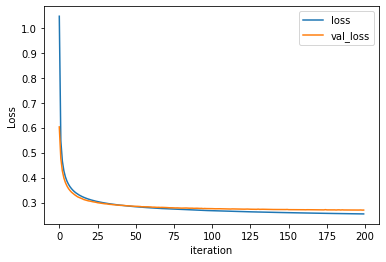

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

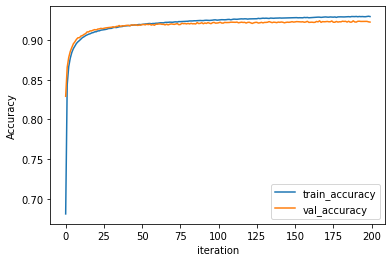

In [26]:

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

##4.Multi-layer Perception - ReLU

In [27]:
tf.random.set_seed(1234) # random value will same with the firt

model  = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd",loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
batch_size = 512
history = model.fit(X_train,y_train,batch_size=batch_size,validation_data=(X_test,y_test),epochs=200,verbose=2)

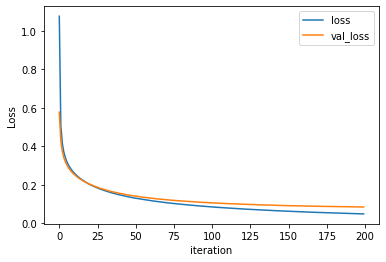

In [29]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

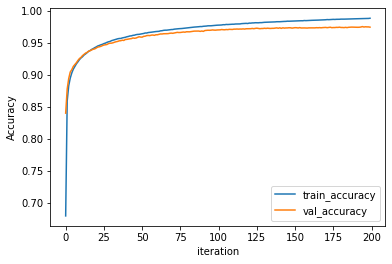

In [30]:
plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()